## PHYS280: HW8
### Kavish Senthilkumar




## Fixed points of chemostat equations


## a

From (12.4),

$$\frac{d\bar \rho}{dt} = (\gamma \frac{\bar c}{1+ \bar c} -1) \bar \rho; \,\,\, \frac{d\bar c}{dt} = \bar c_{in} - \bar c - \gamma  \frac{\bar \rho \bar c}{1+\bar c} $$


Nullcline curves will occur when $\frac{d\bar \rho}{dt}=0$ or $\frac{d\bar c}{dt}=0$.

$$\frac{d\bar \rho}{dt}=0 \implies (\gamma \frac{\bar c}{1+ \bar c} -1) \bar \rho = 0 \implies \bar \rho = 0 \text{ or } \gamma \frac{\bar c}{1+ \bar c}  = 1$$

We see that 

$$\gamma \frac{\bar c}{1+ \bar c}  = 1 \implies y\bar c = {1+ \bar c} \implies \bar c = \frac{1}{\gamma -1}$$

Thus, when $\frac{d\bar \rho}{dt}=0$, $\bar \rho = 0 \text{ or } \bar c = \frac{1}{\gamma -1}$. We now solve for when $\frac{d\bar c}{dt}=0$.


$$\frac{d\bar c}{dt}=0 \implies  \bar c_{in} - \bar c - \gamma  \frac{\bar \rho \bar c}{1+\bar c} = 0 \implies  \bar \rho =  \frac{(\bar c_{in} - \bar c)(1+\bar c)}{\gamma  \bar c}  $$

When $\bar \rho=0$,

$$\bar c_{in} - \bar c = 0 \implies \bar c_{in} = \bar c$$

Thus, our first fixed point is at $\boxed{(\bar c_1 = \bar c_{in}, \bar \rho_1 = 0)}$

When $\bar c = \frac{1}{\gamma -1}$,

$$\rho =  \frac{(\bar c_{in} - (\frac{1}{\gamma -1}))(1+(\frac{1}{\gamma -1}))}{\gamma  (\frac{1}{\gamma -1})} = \bar c_{in} - \frac{1}{\gamma -1}$$

Thus, our second fixed point is at $\boxed{(\bar c_2 = \frac{1}{\gamma -1}, \bar \rho_2 = \bar c_{in} - \frac{1}{\gamma -1})}$



## b

From the book, both $\bar p$ and $\bar c$ must be nonnegative, elsewise a fixed point represents an nonphysical phenomena. With the given values of $\bar p$ and $\bar c$, both fixed points are positive and represent physical phenomena. Thus, they are shown on the phase portrait below. The first fixed point is stable, while the second is unstable.


<IPython.core.display.Javascript object>


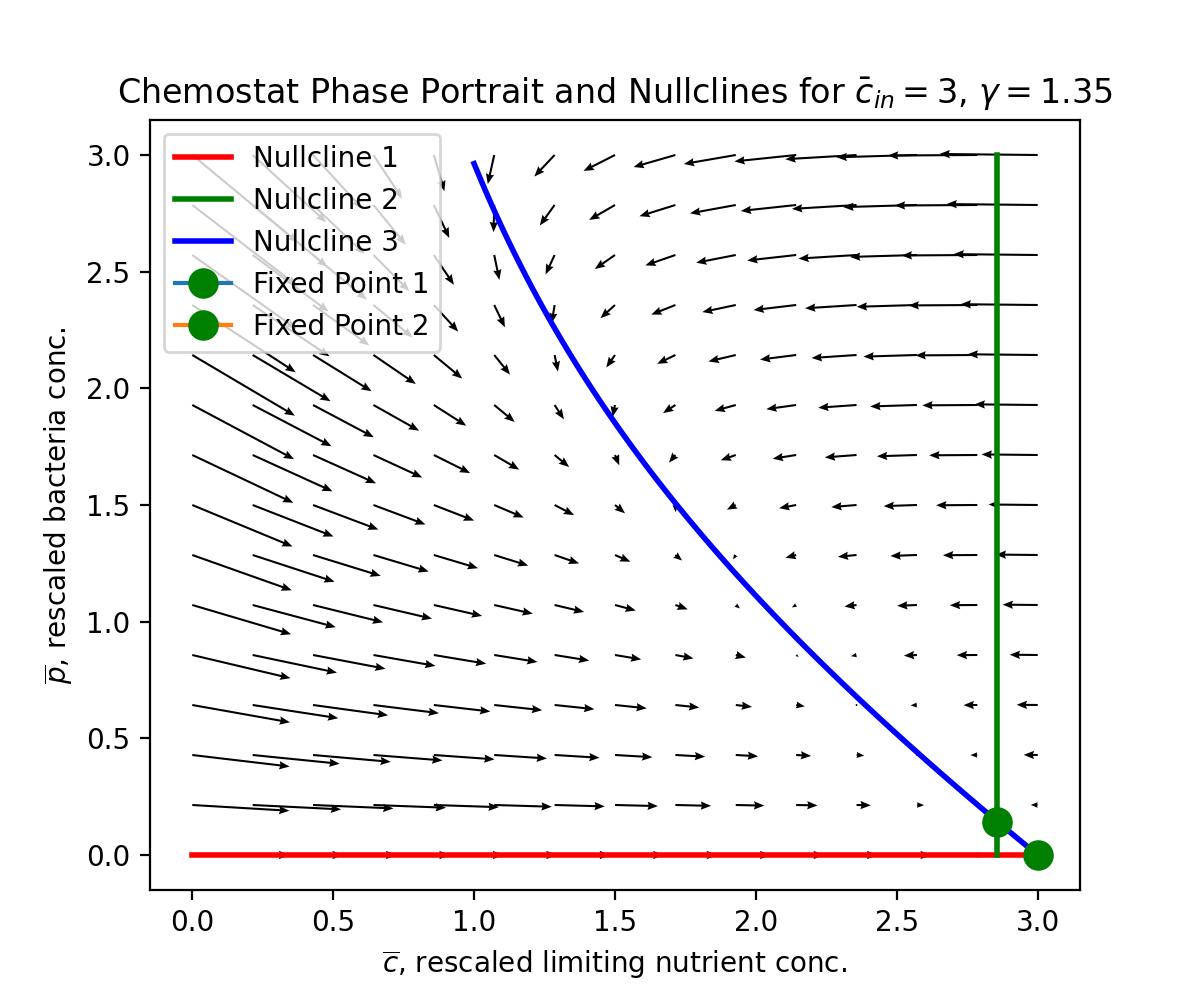

In [3]:
%matplotlib notebook

import numpy as np; import matplotlib.pyplot as plt

myfigsize=(6,5)
gamma = 1.35
cin = 3

#calculates derivative
def myDeriv(input, t): 
    c=input[0]
    p=input[1]
    cfrac = c/(1+c)
    dpdt=p*(gamma*cfrac-1)
    dcdt=cin-c-(gamma*cfrac*p)
    return [dcdt, dpdt]      
          
#Make the vector field on the phase plane
grid = np.linspace(0, 3, 15)
cs, ps = np.meshgrid(grid, grid, indexing='xy')
cdot, pdot = myDeriv([cs,ps], 0)

#plot vector field
plt.figure(0, figsize=myfigsize)
plt.quiver(cs, ps, cdot, pdot, units='xy', \
           angles='xy', width=.008, headwidth = 4, scale=8) 
plt.title(r'Chemostat Phase Portrait and Nullclines for $\bar c_{in}=3$, $\gamma=1.35$')
plt.ylabel(r'$\overline{p}$, rescaled bacteria conc.'); plt.xlabel(r'$\overline{c}$, rescaled limiting nutrient conc.')

#horizontal nullcline
nums = np.linspace(0,3, 15)
plt.plot(nums, np.zeros(15), 'r-', lw=2, label='Nullcline 1')

#horizontal nullcline
plt.plot(np.repeat((1/(gamma-1)), 15), np.linspace(0,3, 15), 'g-', lw=2, label='Nullcline 2')

#other nullcline
c = np.linspace(1, 3, 100)
def null2(c):
    return ((cin-c)*(1+c))/(gamma*c)
plt.plot(c, null2(c), 'b-', lw=2, label='Nullcline 3')

#plot FPs
plt.plot(3, 0, marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green", label=r"Fixed Point 1")
plt.plot((1/(gamma-1)), cin-(1/(gamma-1)), marker="o", markersize=10, markeredgecolor="green",markerfacecolor="green", label=r"Fixed Point 2")
plt.legend()
plt.show()



We note this graph is similar to fig 12.3b. However, since both of our fixed points are nonnegative, both appear on the phase portrait (they are physical phenomena as above)

#### c

Figure 12.3a has $\bar c_{in} = 3, \gamma = 2$, while Figure 12.3b has $\bar c_{in} = 3, \gamma = 1.25$.

In 12.3a, a larger $\gamma$ leads to a stable fixed point around $\bar p =2, \bar c=1$ and an unstable fixed point around $\bar p = 0, \bar c =3$. The phase portrait has two fixed points, because both are nonnegative and represent physical phenomena. The bacterial concentration does not immediately tend to 0 as in 12.3b: it can remain stable at a certain $\bar c$. 

Meanwhile, in 12.3b, a $\gamma < 1.33 \implies \bar c_2 < 0$ from the above fixed point formulas. Thus, only one  fixed point has nonnegative values and represents a physical phenomenon. The value of $\gamma$ is too small, and the flow rate leads to a repalcement time T shorter than the minimum needed for bacterial division. Thus, the bacteria concetration will tend to 0 as the bacteria do not have enough time to multiply. The system stabilizes at a point of no bacteria. This stable fixed point is the only fixed point that represents physical phenomena.


## Novick-Weiner data

## a

We graph $\ln(1-z(t)/z_{max})$ vs. time to get a linear relationship we can easily fit by testing different values of $\tau$. In the first graph, we use a $\ln(1-z(t)/z_{max})$ vs. time graph and find a value of $\tau$ that leads to the best fit. In the second graph, we use this value of $\tau$ in the actual fit equation, and overlay it on top of experimental data. 

<IPython.core.display.Javascript object>


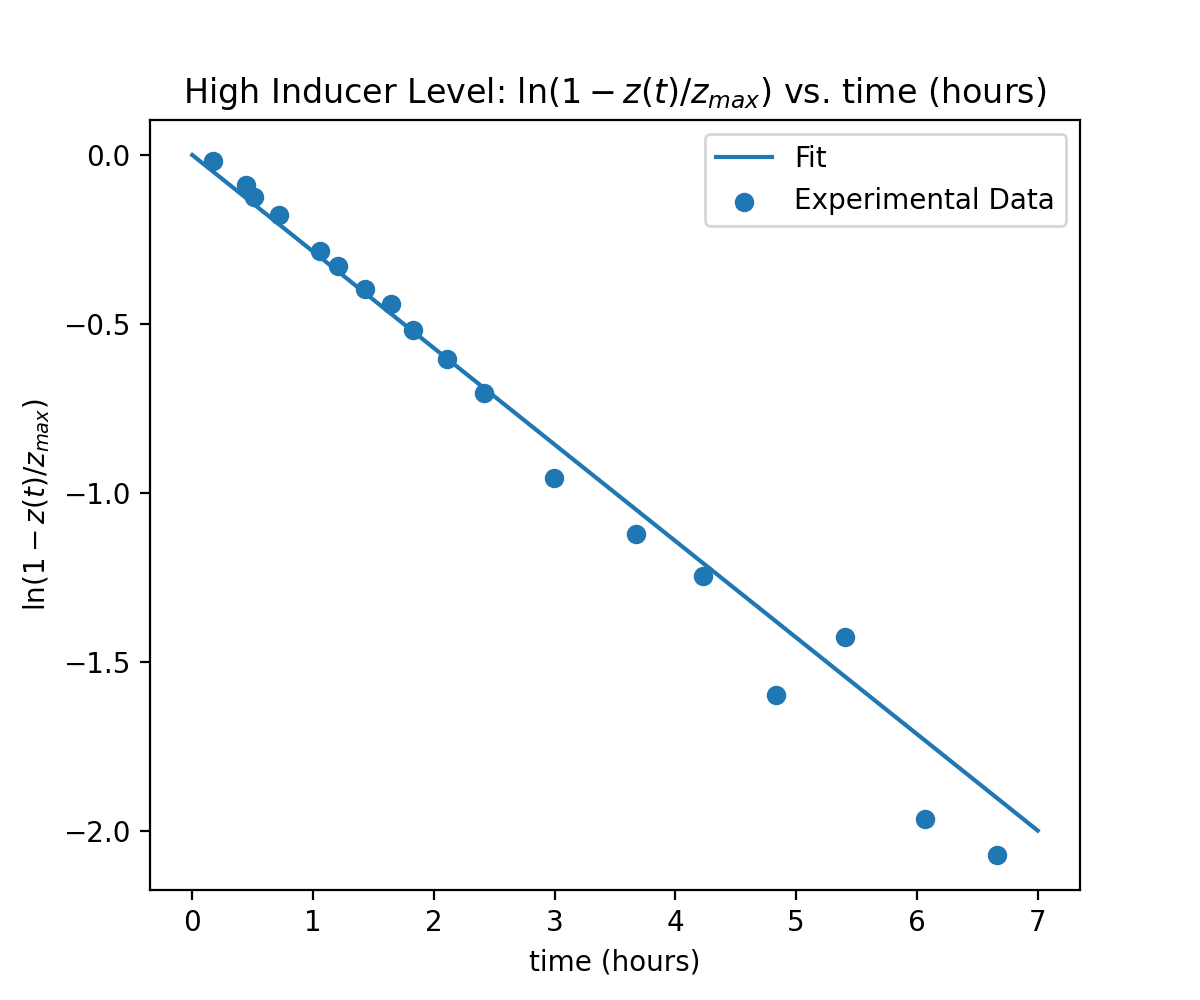

<IPython.core.display.Javascript object>


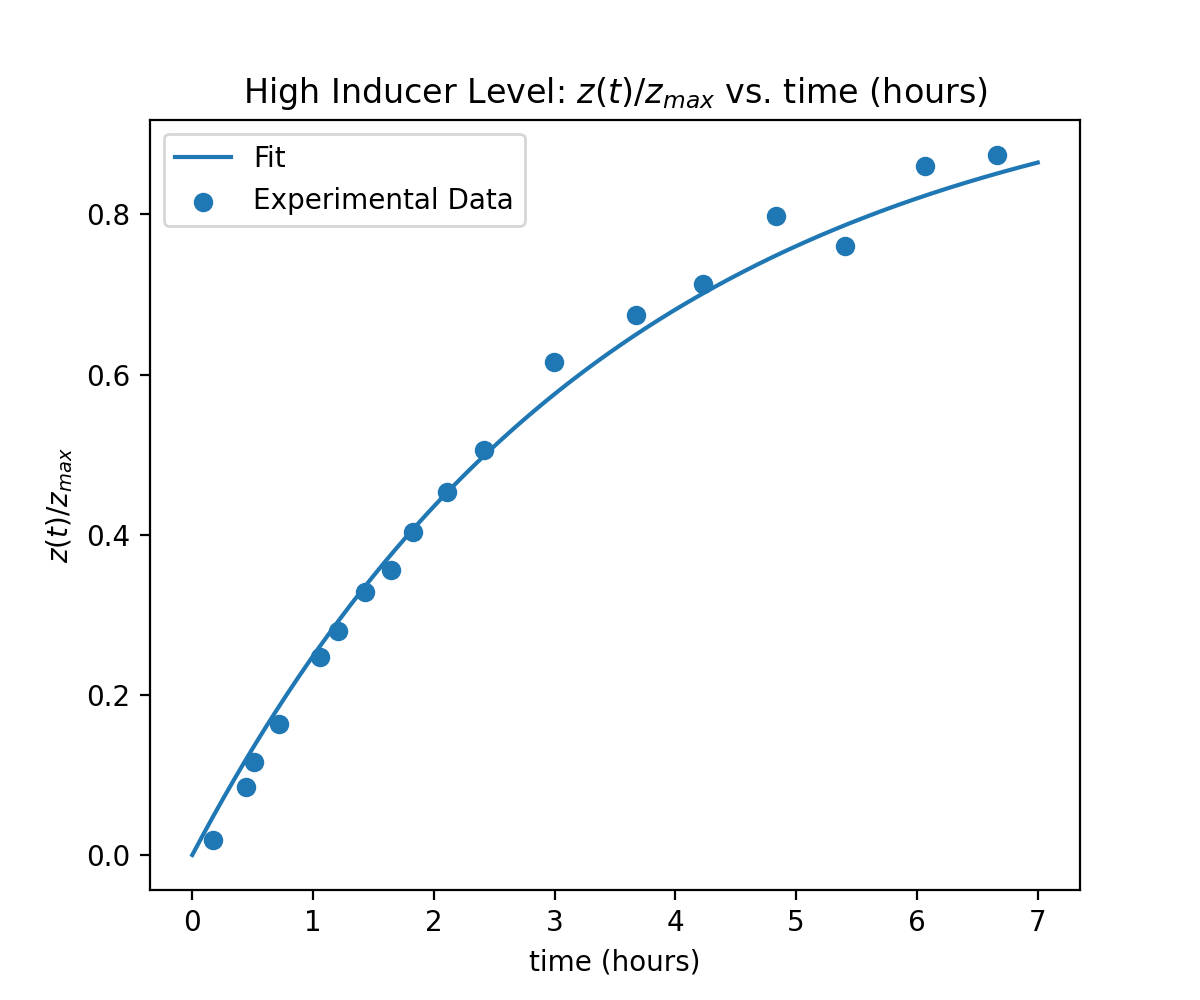

In [4]:
#import data
Adf = np.loadtxt("g149novickA_DATA.txt", delimiter=",")

#plot data
plt.figure(2, figsize=myfigsize)
x1=Adf[:,0]
y1=Adf[:,1]

#graph quantity ln(1-z/z_max)
t1=np.linspace(0,7,5000)
ln=np.log(1-y1)
plt.scatter(x1,ln, label="Experimental Data")
plt.xlabel("time (hours)")
plt.ylabel("$\ln(1-z(t)/z_{max})$")
plt.title(r"High Inducer Level: $\ln(1-z(t)/z_{max})$ vs. time (hours)")
plt.show()

#choose values of tau for a linear fit, and plot exponential model over data
tau=3.5 #value leads to best fit
enz_pop = 1-np.exp(-t1/tau)
plt.xlabel("time (hours)")
plt.ylabel("$\ln(1-z(t)/z_{max})$")
plt.plot(t1, np.log(1-enz_pop), label="Fit")
plt.legend()


#plot data and fit without log adjustment
plt.figure(3, figsize=myfigsize)
plt.title(r"High Inducer Level: $z(t)/z_{max}$ vs. time (hours)")
plt.scatter(x1,y1, label="Experimental Data")
plt.xlabel("time (hours)")
plt.ylabel("$z(t)/z_{max}$")
plt.plot(t1,enz_pop, label="Fit")
plt.legend()

Our value of $\tau$ is 3.5 for this fit. 

## b

When $10 \leq t \leq 15$, the data becomes very linear. We can use this to solve for $z_0$. 

We take our equation $z(t) = z_0 (-1 + t/\tau + e^{-t/\tau})$. For large $t$, $e^{-t/\tau} \rightarrow 0$, and we have a line with slope $z_0/\tau$. 

We will look at the data from $10 \leq t \leq 15$ and make a linear fit, then set this slope to $z_0/\tau$, using our value of $\tau$ from above to find $z_0$.

The first graph has just points from $10 \leq t \leq 15$, allowing us to match a line of best fit and equate that slope to $z_0/\tau$. The graph below overlays the fit with the parameters we found on top of all the experimental data. 

<IPython.core.display.Javascript object>


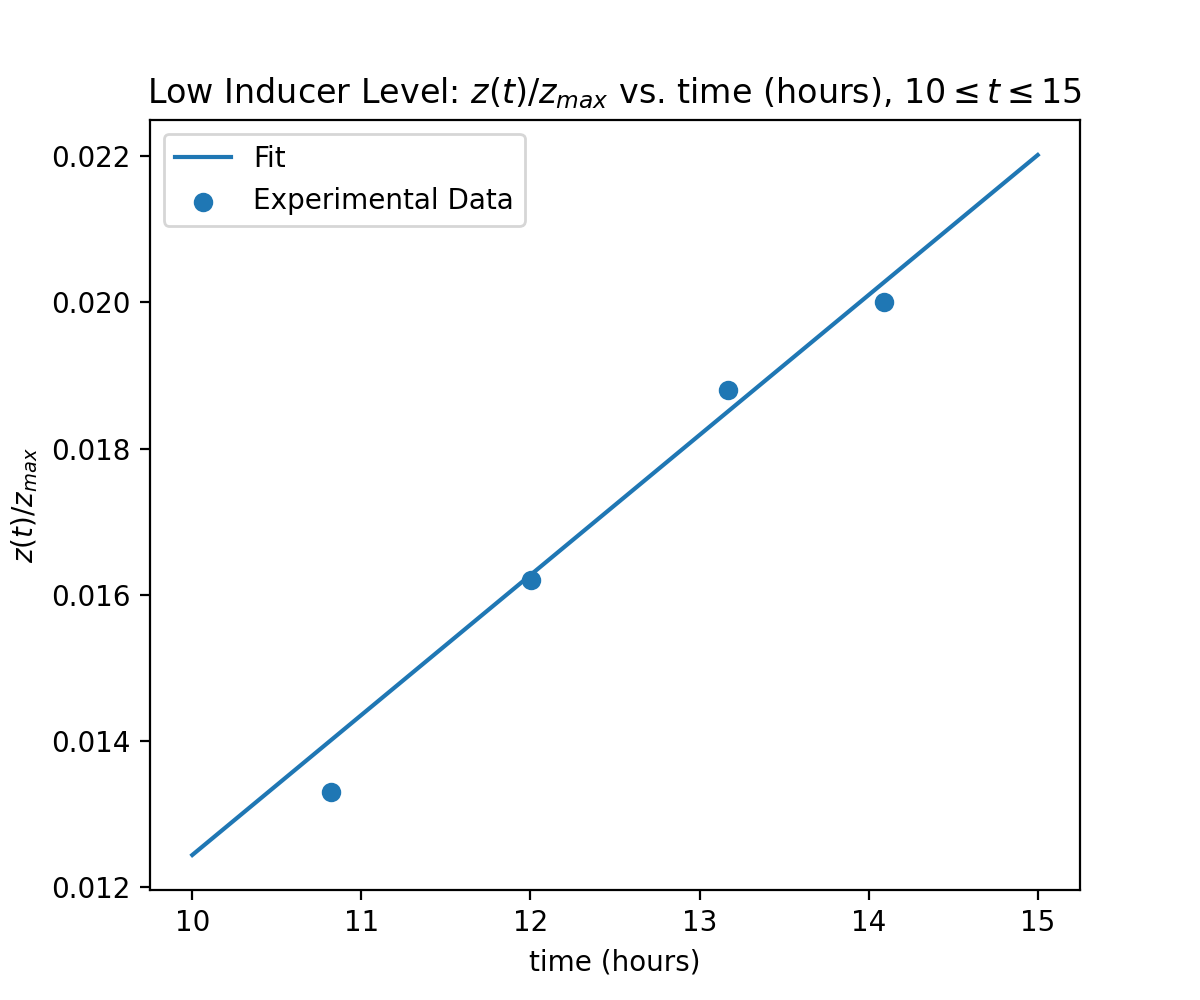

<IPython.core.display.Javascript object>


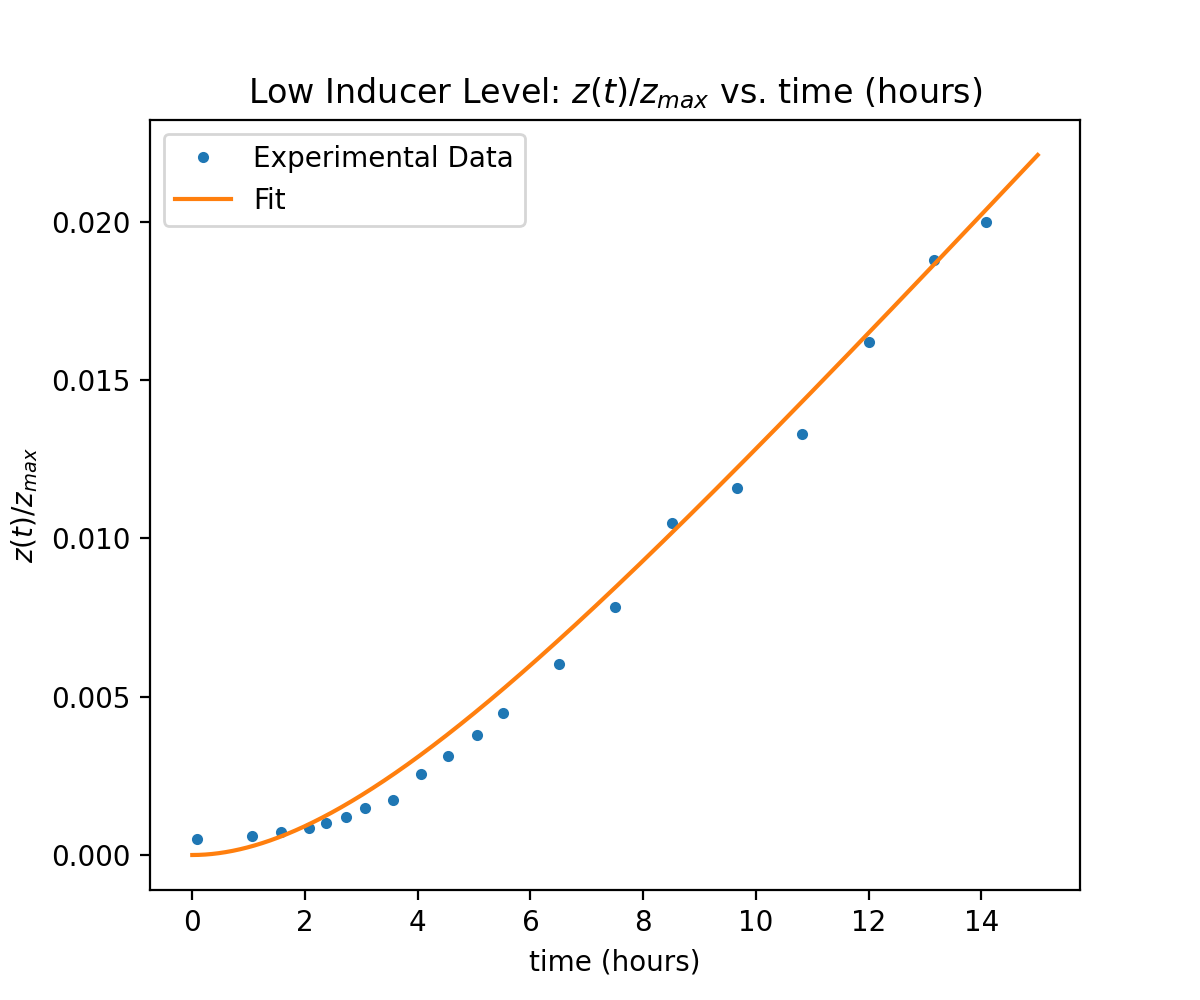

In [5]:
#import data
Bdf = np.loadtxt("g149novickB_DATA.txt", delimiter=",")
tau=3.5

#plot data
plt.figure(4, figsize=myfigsize)
x1=Bdf[:,0]
y1=Bdf[:,1]

#We see we have a strongly linear relation when 10 <= t <= 15 as above.
#We draw a line at these t to find the slope of this line

#graph quantity z/z_max vs t when 10 <= t <= 15
t1=np.linspace(10,15,100)
plt.scatter(x1[x1>10],y1[y1>0.013], label="Experimental Data")
plt.title(r"Low Inducer Level: $z(t)/z_{max}$ vs. time (hours), $10 \leq t \leq 15$")
plt.xlabel("time (hours)")
plt.ylabel("$z(t)/z_{max}$")
plt.show()

z=0.0067
large_t_lin = z*(-1+t1/tau)
plt.plot(t1,large_t_lin, label="Fit")
plt.legend()

#z=0.0067 is our best value. We can use this to graph the complete fit. 
t1=np.linspace(0,15,5000)
enz_pop2 = z*(-1+t1/tau + np.exp(-t1/tau))
plt.figure(5, figsize=myfigsize)
plt.plot(x1,y1, ".", label="Experimental Data")
plt.plot(t1, enz_pop2, label="Fit")
plt.title(r"Low Inducer Level: $z(t)/z_{max}$ vs. time (hours)")
plt.xlabel("time (hours)")
plt.ylabel("$z(t)/z_{max}$")
plt.legend()


We conclude with a value of $z_0=0.0067$ from our fits

### My little runaway

We begin with the equation in the solution we must integrate:

$$\frac{dx}{1-x^2} = dt$$
$$\int \frac{dx}{1-x^2} = \int dt$$
$$\int \frac{1/2}{(1-x)} + \int \frac{1/2}{(1+x)} dx = t + C_1$$
$$-\frac{1}{2} \ln|1-x| + \frac{1}{2} \ln|1+x|+C_2 = t+C_1$$
$$-\frac{1}{2} \ln|1-x| + \frac{1}{2} \ln|1+x|+C_2 = t+C_1$$

Rewriting our constant term as $\ln(A)$, 
$$(\ln\frac{|1-x|}{|1+x|}) = -2t+\ln(A)$$
$$(\ln\frac{|1-x|}{|1+x|}) = \ln(Ae^{-2t})$$
$$(\frac{|1-x|}{|1+x|}) = (Ae^{-2t})$$

Assuming $-1 < x \leq 1$, 

$$\frac{1-x}{1+x} = (Ae^{-2t})$$
$$1-x = (Ae^{-2t}) + (Ae^{-2t})x$$
$$x = \frac{1+Ae^{-2t}}{1-Ae^{-2t}}$$

When $x_0=x(0)$, using an above equation we have 

$$x_0 = \frac{1+A}{1-A}$$
$$x_0 -1 = +A+x_0 A$$

$$\frac{x_0-1}{1+x_0} = A$$

We plot below, subbing this value of A into our solution. We plot with a nonlog and log scale to see the behavior of the solution at various values of $x_0$. 

<IPython.core.display.Javascript object>


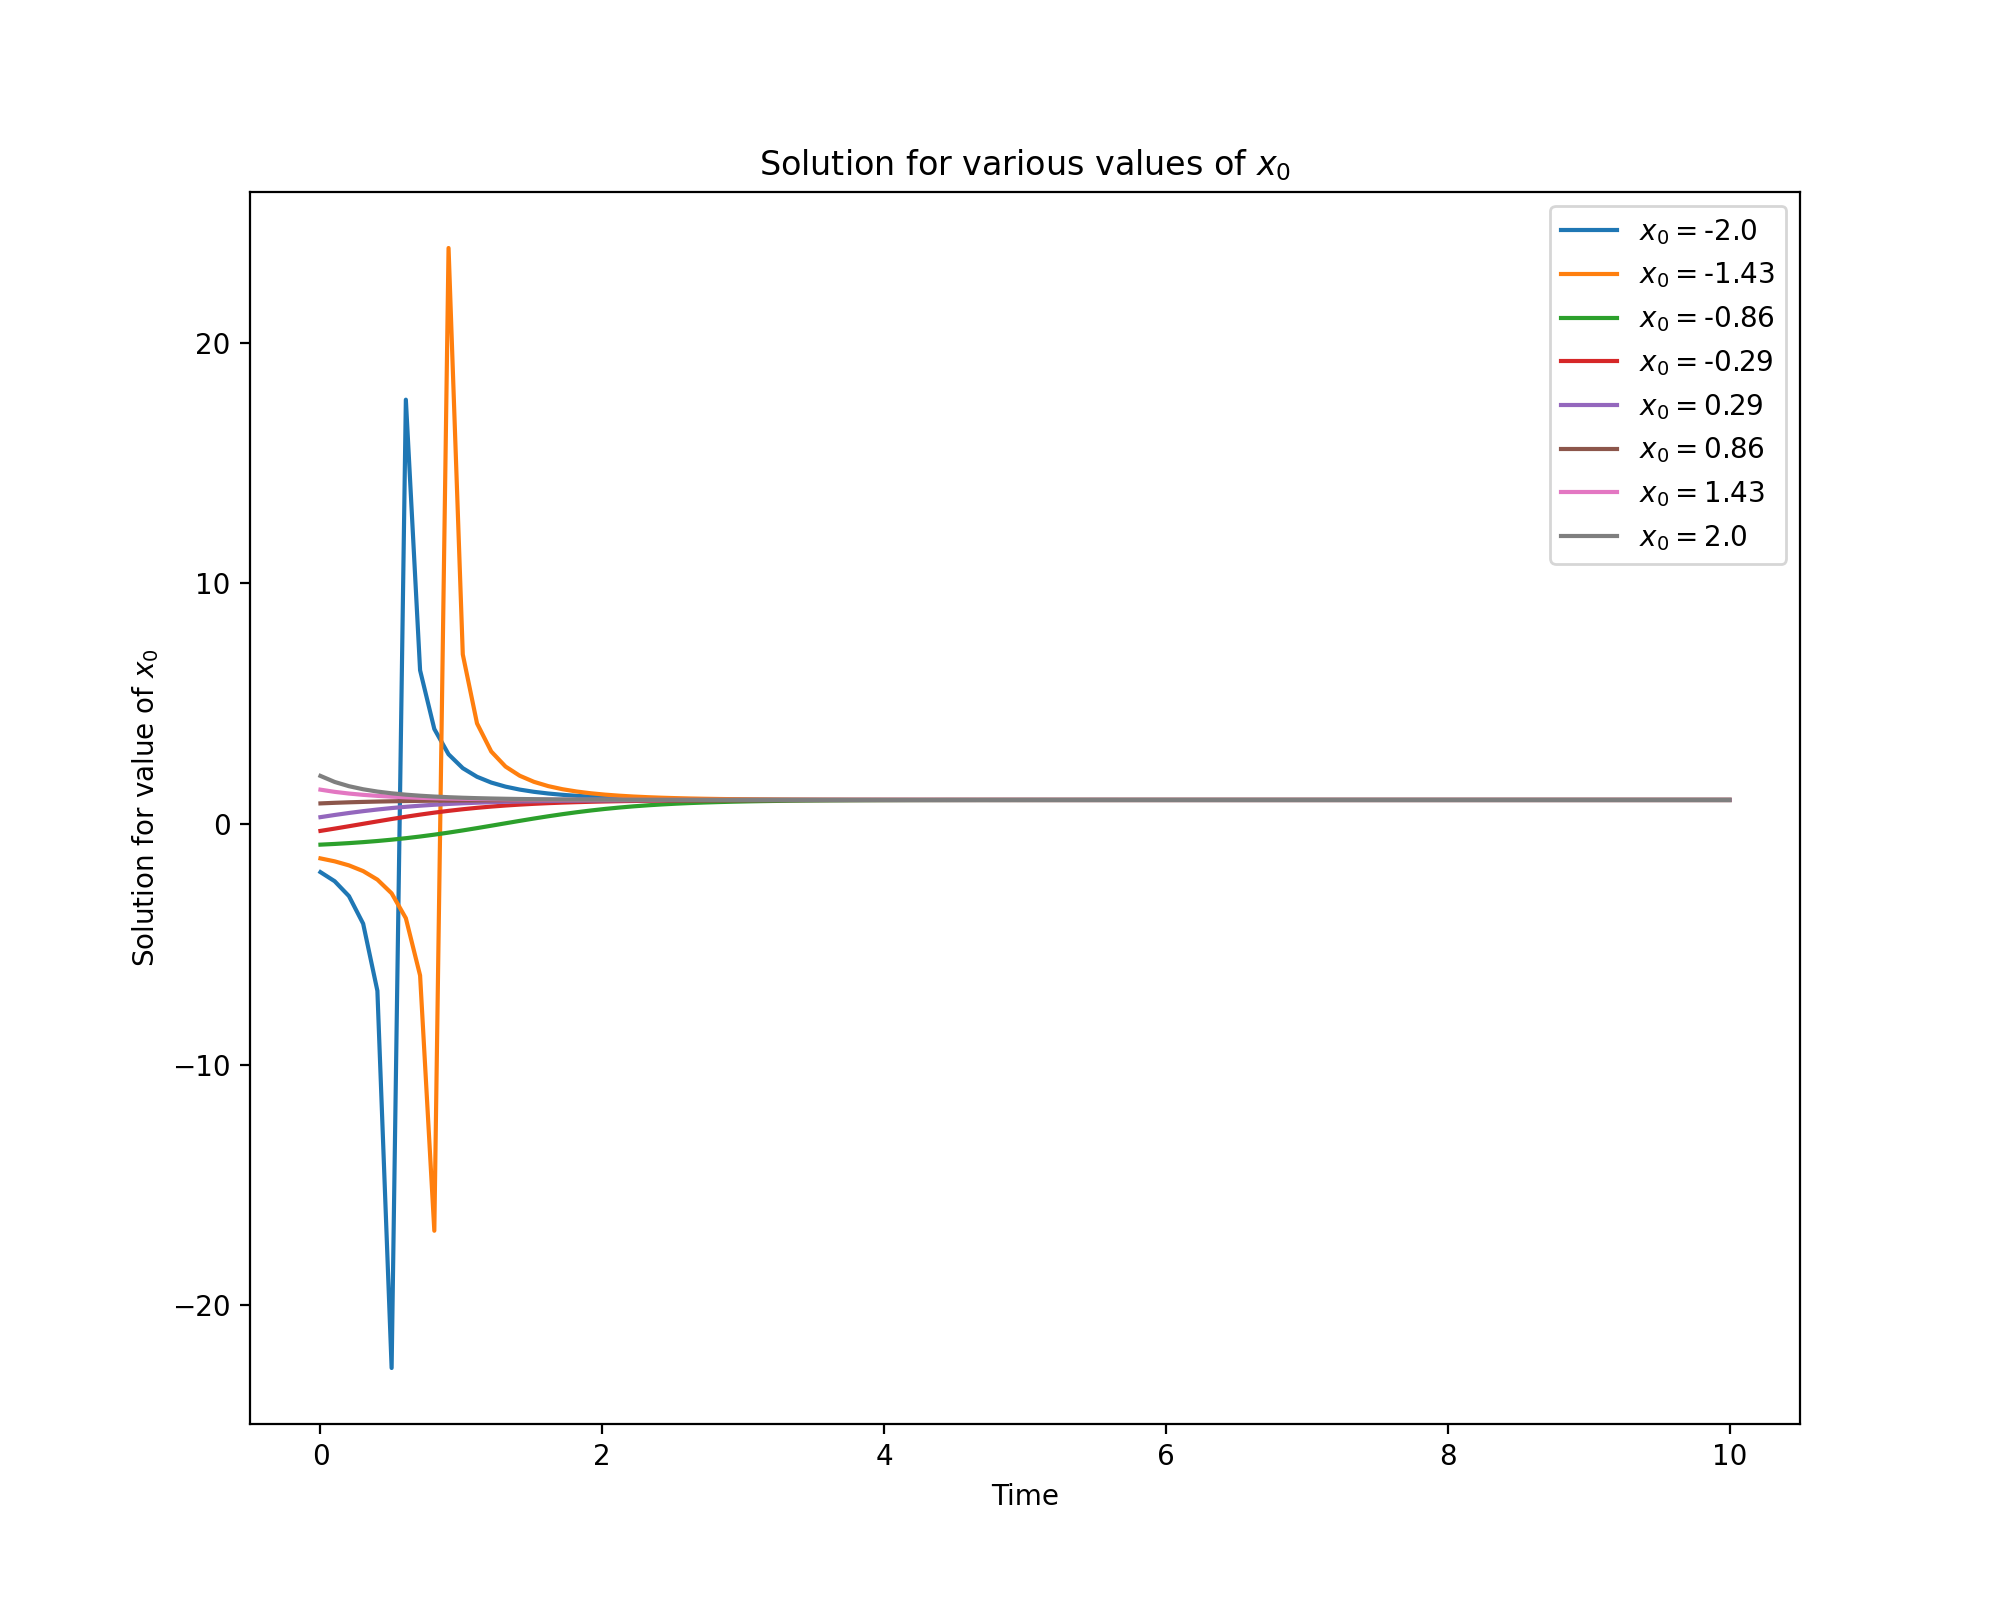

<IPython.core.display.Javascript object>


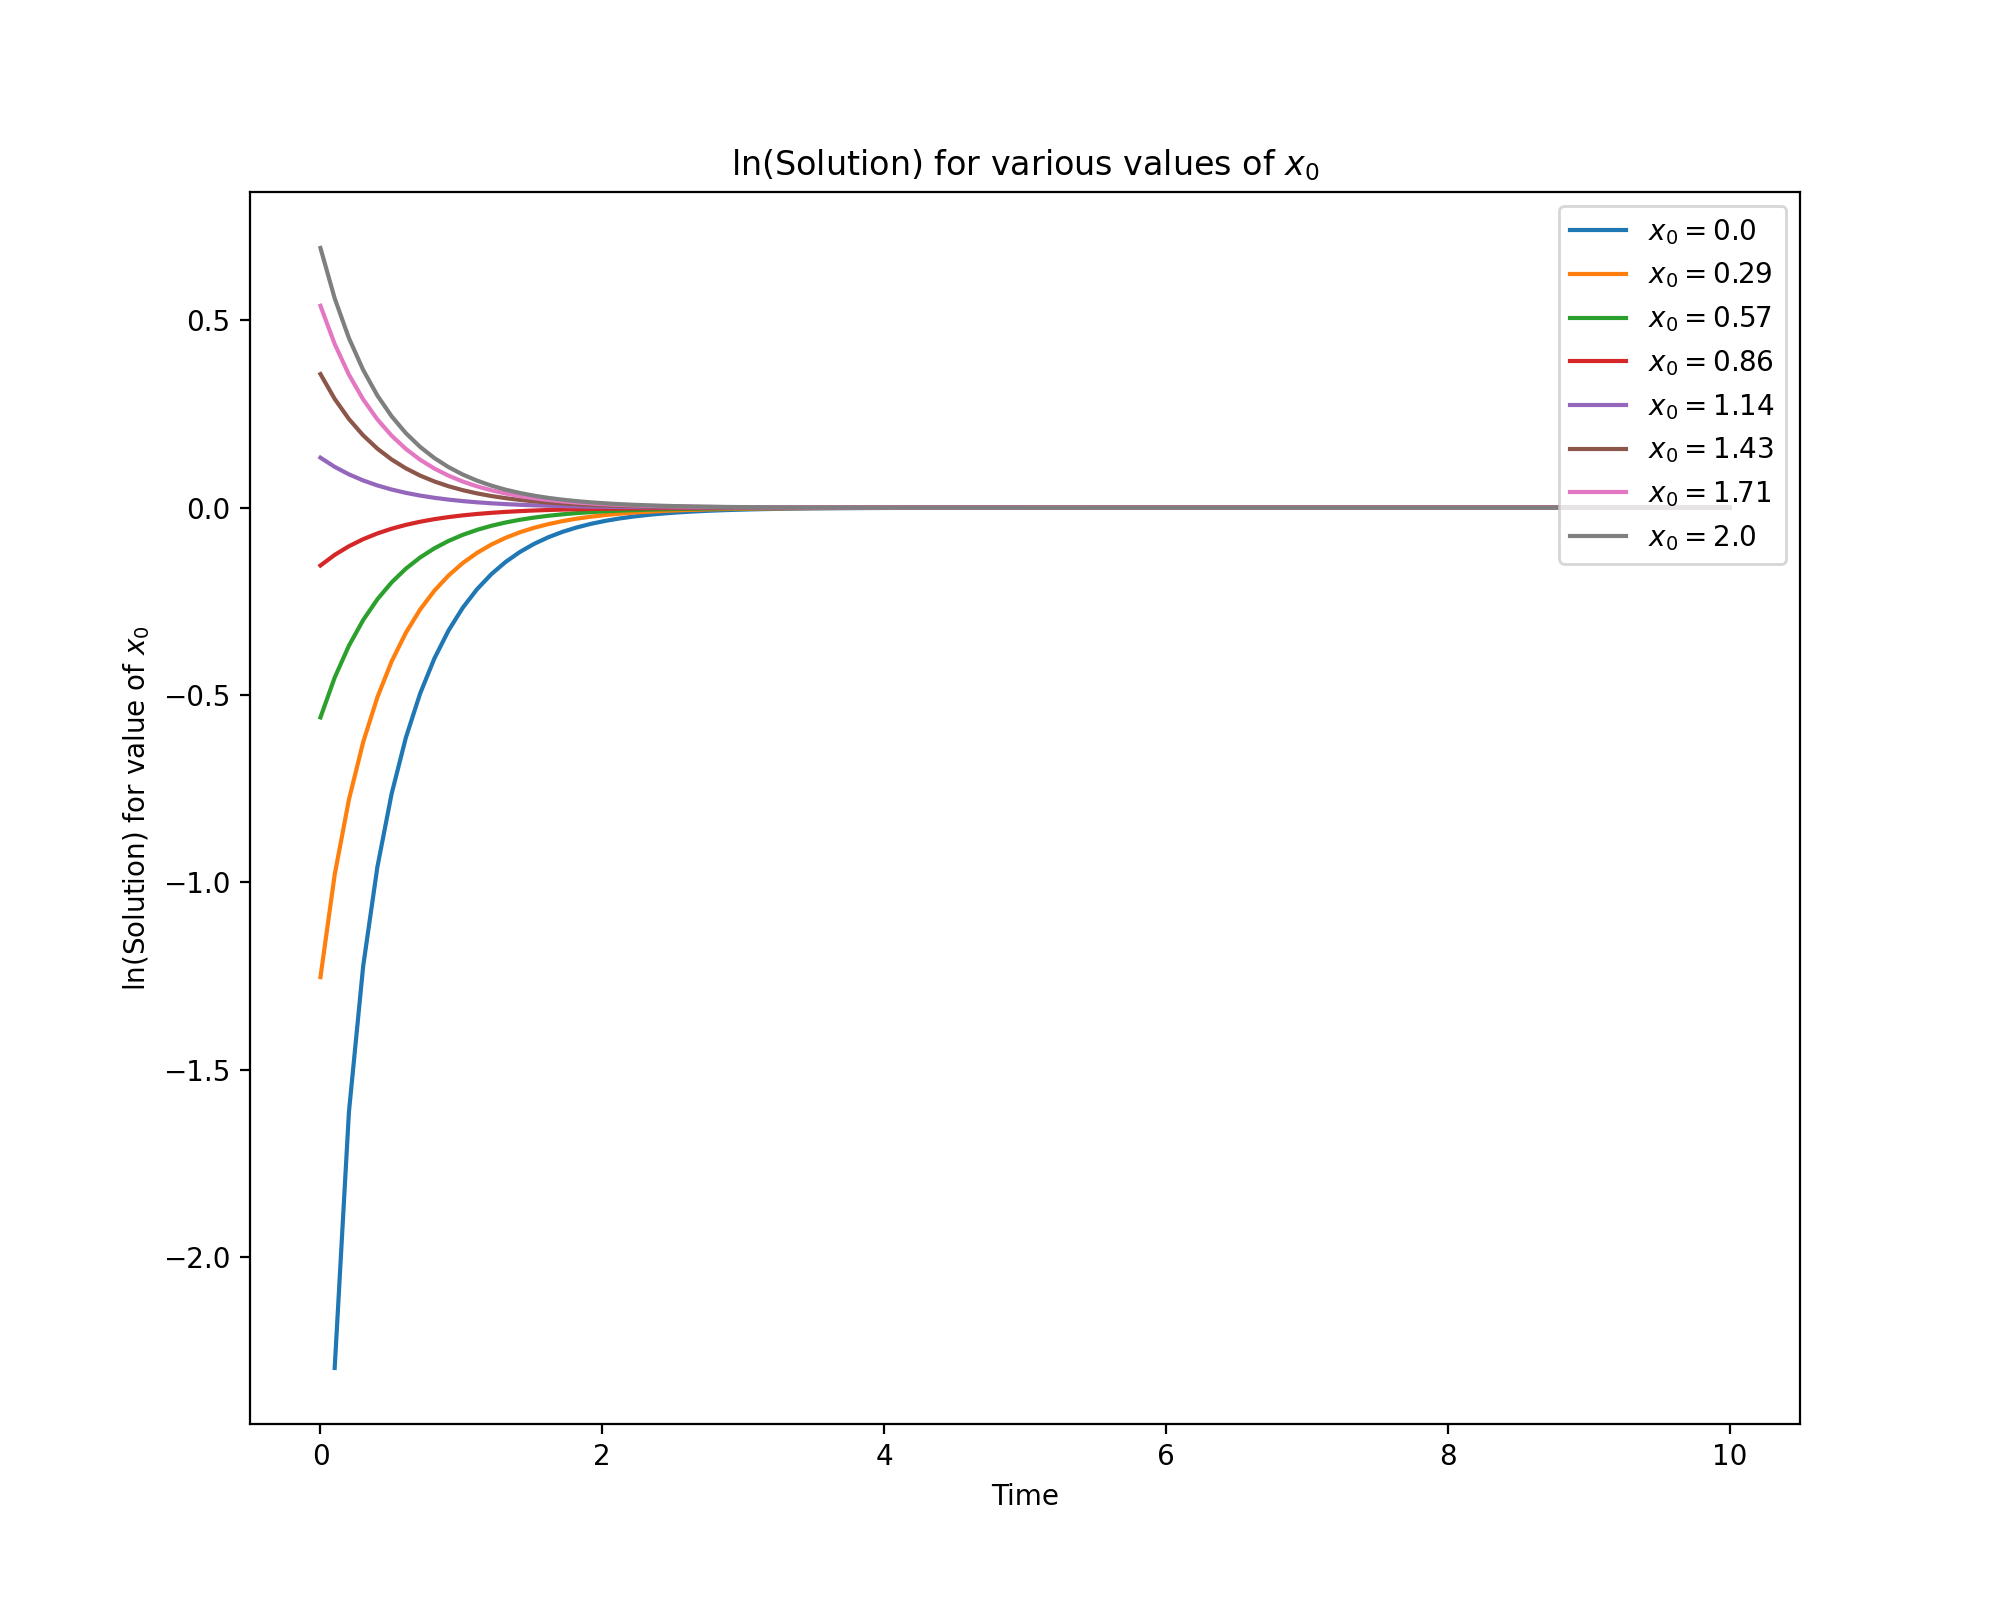

<ipython-input-6-1f50ff23cc07>:23: RuntimeWarning: divide by zero encountered in log
  plt.plot(t, np.log(soln), label = r"$x_0=$" + str(np.round(x,decimals=2)))


In [6]:
#Plot solutions
plt.figure(6, figsize=(10,8))
x0 = np.linspace(-2, 2, 8)
for x in x0:
    A = (x-1)/(1+x)
    t=np.linspace(0,10,100)
    soln=(1+A*np.exp(-2*t))/(1-A*np.exp(-2*t))
    plt.plot(t, soln, label = r"$x_0=$" + str(np.round(x,decimals=2)))

plt.title("Solution for various values of $x_0$")
plt.xlabel("Time")
plt.ylabel("Solution for value of $x_0$")
plt.legend( loc='upper right')
plt.show()

#Plot log(solutions) for x>0
plt.figure(7, figsize=(10,8))
x0 = np.linspace(0, 2, 8)
for x in x0:
    A = (x-1)/(1+x)
    t=np.linspace(0,10,100)
    soln=(1+A*np.exp(-2*t))/(1-A*np.exp(-2*t))
    plt.plot(t, np.log(soln), label = r"$x_0=$" + str(np.round(x,decimals=2)))

plt.title("ln(Solution) for various values of $x_0$")
plt.xlabel("Time")
plt.ylabel("ln(Solution) for value of $x_0$")

plt.legend( loc='upper right')
plt.show()

In the first plot, we observe the behavior that initial values less than $-1$ lead to "running away", wherein $x$ tends to $-\infty$. Otherwise, for $x \geq -1$, the solutions all tend to 0 regardless of starting value. This makes sense with the logistic model, and is further shown in the below graph, where for initial values of $x \geq 0$, the natural log of the solution clearly converges as well.  



### Credits
Jas, Sagar for code in Q2 and Q3, YouTube video for integration help, StackExchange for quiver function help.